In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
%matplotlib inline



In [2]:
# Open Earthchem dataset
df = pd.read_csv('earthchem_download_95122.txt', delimiter = "\t")
columns = df.keys()
df.columns = columns


In [3]:
df.keys()

Index(['SAMPLE ID', 'IGSN', 'SOURCE', 'REFERENCE', 'CRUISE ID', 'LATITUDE',
       'LONGITUDE', 'LOC PREC', 'MIN AGE', 'AGE',
       ...
       'ZR', 'TI.1', 'AS.2', 'AS.3', 'GER.1', 'H2O_M.1', 'H2O_P.1', 'H2O_M.2',
       'H2O_P.2', 'INDIUM.1'],
      dtype='object', length=151)

In [4]:
df

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,...,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,...,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,...,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,...,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3059,DBF04-6,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1928,-69.2434,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,DBF04-5,NaN,GEOROC,"JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...",NaN,-18.1929,-69.2433,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.3014,-69.2431,0.01,2.6,12.80,...,101.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [5]:
# Find number of null values in each column
df.isnull().sum()

SAMPLE ID       0
IGSN         3063
SOURCE          0
REFERENCE       0
CRUISE ID    3052
             ... 
H2O_M.1      2982
H2O_P.1      2900
H2O_M.2      2982
H2O_P.2      2900
INDIUM.1     3060
Length: 151, dtype: int64

In [6]:
# Each row has something that is missing
data_new = df.dropna()
data_new

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,...,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1


In [7]:
df.describe()

,IGSN,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,MAX AGE,MINERAL,SIO2,TIO2,...,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
count,0.0,3063.000000,3063.000000,3063.000000,1352.000000,1440.000000,1352.000000,0.0,2140.000000,2137.000000,...,1647.000000,200.000000,239.000000,239.000000,33.000000,81.000000,163.000000,81.000000,163.000000,3.0
mean,NaN,-29.436414,-69.961676,0.009968,40.972882,54.259535,66.329437,NaN,69.727827,0.506845,...,190.392557,828.254428,18.374184,18.374184,3.537576,0.562716,0.966994,0.562716,0.966994,0.0
std,NaN,9.817008,2.227382,0.000567,258.564503,320.506284,396.412106,NaN,4.586499,0.295716,...,151.644587,890.055116,24.401248,24.401248,4.166317,0.535546,0.875199,0.535546,0.875199,0.0
min,NaN,-54.800000,-78.518000,0.000010,-0.002000,-19.300000,-0.000409,NaN,36.782000,0.002000,...,0.000000,0.005000,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.0
25%,NaN,-38.769400,-71.699050,0.010000,-0.000001,-0.000001,-0.000001,NaN,66.144000,0.287000,...,124.000000,655.512500,8.000000,8.000000,1.000000,0.200000,0.210000,0.200000,0.210000,0.0
50%,NaN,-26.420000,-70.250000,0.010000,0.010000,1.305000,2.600000,NaN,69.327500,0.539000,...,169.000000,718.700000,12.910000,12.910000,1.600000,0.330000,0.790000,0.330000,0.790000,0.0
75%,NaN,-21.246800,-68.000000,0.010000,2.600000,12.800000,16.000000,NaN,73.389750,0.659000,...,221.000000,760.175000,22.175000,22.175000,5.510000,0.750000,1.510000,0.750000,1.510000,0.0
max,NaN,-6.975000,-64.440000,0.010000,2500.000000,3175.000000,3850.000000,NaN,85.189000,4.812000,...,2488.000000,5000.000000,280.000000,280.000000,20.000000,2.530000,4.860000,2.530000,4.860000,0.0


# Drop rows with no Silica values 
To see if a sample is obsidian, we need to know their silica value

In [8]:
df.dropna(subset=['SIO2'])

,SAMPLE ID,IGSN,SOURCE,REFERENCE,CRUISE ID,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,AGE,...,ZR,TI.1,AS.2,AS.3,GER.1,H2O_M.1,H2O_P.1,H2O_M.2,H2O_P.2,INDIUM.1
0,080385-4,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230483-3,NaN,GEOROC,"HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...",NaN,-41.1000,-72.4930,0.01,NaN,NaN,...,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PU-02-34,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5088,-72.2060,0.01,NaN,NaN,...,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PU-02-25,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5275,-72.1812,0.01,NaN,NaN,...,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PU-02-20,NaN,GEOROC,"SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...",NaN,-40.5675,-72.1743,0.01,NaN,NaN,...,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,AJO 017,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.2167,-69.2125,0.01,2.6,12.80,...,73.0,NaN,NaN,NaN,NaN,NaN,0.79,NaN,0.79,NaN
3057,AJO017,NaN,GEOROC,"DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....",NaN,-18.2458,-69.2194,0.01,NaN,NaN,...,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3058,DBF-03-05,NaN,GEOROC,"HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007",NaN,-18.1958,-69.2527,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,CHO 099,NaN,GEOROC,"MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010",NaN,-18.3014,-69.2431,0.01,2.6,12.80,...,101.0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN


In [9]:
# Drop columns with less than 50% data 

limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df.columns


Index(['SAMPLE ID', 'SOURCE', 'REFERENCE', 'LATITUDE', 'LONGITUDE', 'LOC PREC',
       'MATERIAL', 'TYPE', 'COMPOSITION', 'ROCK NAME', 'SIO2', 'TIO2', 'AL2O3',
       'FEOT', 'MNO', 'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR',
       'TH', 'ZR'],
      dtype='object')

# heatmap 
For starters, we see that with silica, we have high negative correlations with TiO2, Al203, FeoT, MgO, and CaO

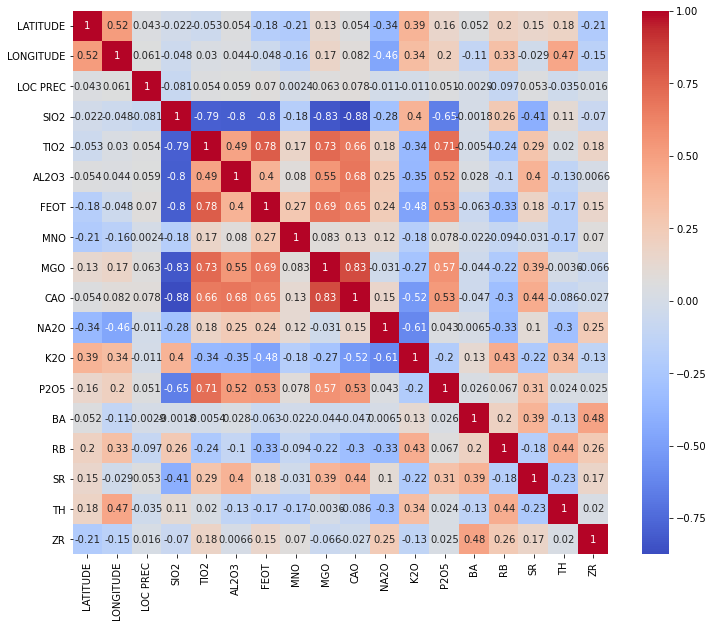

In [10]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

In [11]:
# Mini Test:
# Took a random paper as a target and saw if we could identify the most informative features looking at the 
# 5 negative correlated features
# Change target to 1 and 0

data_baby = df
target = {'RODRIGUEZ, C.; SELLES, D.; DUNGAN, M. A.; LANGMUIR, C. H.; LEEMAN, W. P., 2007':1,
          ' ':0}

data_baby['target']= data_baby['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_baby['target'] = data_baby['target'].fillna(0)

data_baby = data_baby.dropna()

<ipython-input-11-6b6413fe59df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baby['target']= data_baby['REFERENCE'].map(target)
<ipython-input-11-6b6413fe59df>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baby['target'] = data_baby['target'].fillna(0)


In [12]:
# Get 5 most informative features

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 42)
#Transforming data using RFE


X = data_baby[['SIO2','TIO2','AL2O3','FEOT','MGO','CAO', 'NA2O']]
y = data_baby['target']


X

/Users/francescalingo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=42 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


,SIO2,TIO2,AL2O3,FEOT,MGO,CAO,NA2O
0,69.144,0.565,14.590,4.261,1.111,3.544,4.402
1,63.541,0.796,16.427,5.973,1.732,5.136,4.562
2,70.931,0.340,13.794,4.671,0.310,1.771,5.182
3,70.047,0.688,14.039,4.367,0.638,2.154,5.195
4,69.367,0.531,14.150,5.167,0.471,2.213,5.167
...,...,...,...,...,...,...,...
3055,75.549,0.205,13.303,1.201,0.185,0.893,3.880
3056,74.796,0.274,13.367,1.418,0.478,1.078,3.680
3057,75.237,0.258,13.388,1.419,0.381,1.051,3.545
3061,66.728,0.555,17.025,3.542,0.807,3.845,4.087


In [13]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3055    0.0
3056    0.0
3057    0.0
3061    0.0
3062    0.0
Name: target, Length: 1161, dtype: float64

In [14]:
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


In [15]:
# # of features
nof_list=np.arange(1,4)            
high_score=0

# Store the optimum features
nof=0           
score_list =[]


In [16]:
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                        test_size = 0.3,
                                                        random_state = 42)
    
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

# Optimum features is 3 
# but score is extremely weak... But is this due to the negative correlation? or that this method is trash?

Optimum number of features: 3
Score with 3 features: 0.051561


/Users/francescalingo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/francescalingo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/francescalingo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [22]:
# List the 5 best features in a row

cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y) 

#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MGO', 'CAO', 'NA2O'], dtype='object')


/Users/francescalingo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# How to plot values on a map

In [32]:
import geopandas
from shapely.geos import lgeos
import fiona
from shapely.geometry import Polygon

#import geoplot

In [33]:
# Sample dataset with long lat to plot

data_new = df[:5]

# select multiple columns
data_new = data_new.loc[:5,['LATITUDE', 'LONGITUDE', 'ZR']]
print(data_new)


   LATITUDE  LONGITUDE     ZR
0  -41.1000   -72.4930  282.0
1  -41.1000   -72.4930  195.0
2  -40.5088   -72.2060  307.0
3  -40.5275   -72.1812  342.0
4  -40.5675   -72.1743  308.0


In [34]:
gdf = geopandas.GeoDataFrame(data_new, geometry=geopandas.points_from_xy(data_new['LONGITUDE'],data_new['LATITUDE']))
print(gdf.head)

<bound method NDFrame.head of    LATITUDE  LONGITUDE     ZR                     geometry
0  -41.1000   -72.4930  282.0  POINT (-72.49300 -41.10000)
1  -41.1000   -72.4930  195.0  POINT (-72.49300 -41.10000)
2  -40.5088   -72.2060  307.0  POINT (-72.20600 -40.50880)
3  -40.5275   -72.1812  342.0  POINT (-72.18120 -40.52750)
4  -40.5675   -72.1743  308.0  POINT (-72.17430 -40.56750)>


Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentExcept

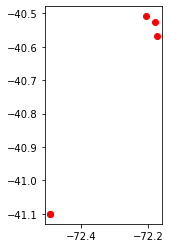

In [35]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()